# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [ ]:
real_data = pd.read_csv('/content/trainingdata.csv',nrows=1000)
real_data

,CustomerId,order_id,CreditScore,First Name,Middle Initial,Last Name,Gender,age,EMail,Customer Since,SSN,PhoneNumber,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,100354678,15674932,668,Jani,W,Titus,F,43,jani.titus@gmail.com,8/22/2006,627-31-5251,4614553903,France,3,0.00,2,1,0,181449.97,0
1,100354677,15749177,627,Lee,S,Eaker,M,28,lee.eaker@gmail.com,02-04-1981,185-86-4345,6294711655,France,1,0.00,2,1,1,49503.50,0
2,100354679,15694510,678,Jason,G,Simoneau,M,65,jason.simoneau@gmail.com,6/27/2010,215-91-8189,2244436994,France,10,0.00,2,1,0,184866.69,0
3,100354681,15741417,581,Grover,X,Bayless,M,33,grover.bayless@yahoo.com,04-03-1992,018-94-9306,2255625249,France,2,148882.54,1,1,1,84560.88,0
4,100354683,15766172,716,Albertina,U,Bensen,F,73,albertina.bensen@gmail.com,6/21/2015,466-99-5934,3659675721,Spain,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100356197,15654859,635,Maude,F,Hairston,F,36,maude.hairston@hotmail.com,09-04-2016,139-23-0282,5277495656,France,7,0.00,1,1,1,171513.87,0
996,100356193,15707541,561,Dot,Q,Bracero,F,56,dot.bracero@aol.com,11-08-2005,232-57-9232,1719681927,France,6,125889.13,1,1,0,171922.71,0
997,100356199,15593595,591,Aurea,M,Hinnant,F,24,aurea.hinnant@yahoo.com,1/15/1988,183-86-7603,5187307519,France,8,0.00,2,1,1,73949.62,0
998,100356204,15573309,626,Rochelle,D,Tolentino,F,45,rochelle.tolentino@aol.com,08-02-2010,175-86-1806,1745013501,Spain,2,0.00,2,1,0,95794.98,0


In [ ]:
real_data.columns

Index(['CustomerId', 'order_id', 'CreditScore', 'First Name', 'Middle Initial',
       'Last Name', 'Gender', 'age', 'EMail', 'Customer Since', 'SSN',
       'PhoneNumber', 'Geography', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = real_data

In [ ]:
target = 'Exited'
primarykey = 'CustomerId'

# Exploratory Data Analysis

In [ ]:
real_data.dtypes

CustomerId           int64
order_id             int64
CreditScore          int64
First Name          object
Middle Initial      object
Last Name           object
Gender              object
age                  int64
EMail               object
Customer Since      object
SSN                 object
PhoneNumber          int64
Geography           object
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Handle missing values
data.isnull().any()

CustomerId         False
order_id           False
CreditScore        False
First Name         False
Middle Initial     False
Last Name          False
Gender             False
age                False
EMail              False
Customer Since     False
SSN                False
PhoneNumber        False
Geography          False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
print("shape of the data:", data.shape)

shape of the data: (1000, 20)


In [ ]:
print("features:",data.columns)

features: Index(['CustomerId', 'order_id', 'CreditScore', 'First Name', 'Middle Initial',
       'Last Name', 'Gender', 'age', 'EMail', 'Customer Since', 'SSN',
       'PhoneNumber', 'Geography', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
data.describe()

,CustomerId,order_id,CreditScore,age,PhoneNumber,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+03,1.000000e+03,1000.000000,1000.0000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.003554e+08,1.569111e+07,654.528000,46.1760,5.418147e+09,5.127000,56717.300230,1.549000,0.741000,0.494000,113272.29471,0.203000
std,1.361844e+03,7.233073e+04,80.055769,16.0829,2.628763e+09,2.889155,63116.476344,0.554894,0.438305,0.500214,50296.51546,0.402434
min,1.003547e+08,1.556654e+07,359.000000,18.0000,1.001044e+09,0.000000,0.000000,1.000000,0.000000,0.000000,106.67000,0.000000
25%,1.003550e+08,1.562973e+07,596.750000,32.0000,3.122934e+09,3.000000,0.000000,1.000000,0.000000,0.000000,74886.84250,0.000000
50%,1.003554e+08,1.569106e+07,658.500000,47.0000,5.290569e+09,5.000000,0.000000,2.000000,1.000000,0.000000,120133.53000,0.000000
75%,1.003558e+08,1.575795e+07,710.000000,59.0000,7.771624e+09,8.000000,121564.950000,2.000000,1.000000,1.000000,155800.66250,0.000000
max,1.003960e+08,1.581330e+07,850.000000,75.0000,9.996052e+09,10.000000,191523.090000,4.000000,1.000000,1.000000,199929.17000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       1000 non-null   int64  
 1   order_id         1000 non-null   int64  
 2   CreditScore      1000 non-null   int64  
 3   First Name       1000 non-null   object 
 4   Middle Initial   1000 non-null   object 
 5   Last Name        1000 non-null   object 
 6   Gender           1000 non-null   object 
 7   age              1000 non-null   int64  
 8   EMail            1000 non-null   object 
 9   Customer Since   1000 non-null   object 
 10  SSN              1000 non-null   object 
 11  PhoneNumber      1000 non-null   int64  
 12  Geography        1000 non-null   object 
 13  Tenure           1000 non-null   int64  
 14  Balance          1000 non-null   float64
 15  NumOfProducts    1000 non-null   int64  
 16  HasCrCard        1000 non-null   int64  
 17  IsActiveMember 

In [ ]:
data.describe(include=["object", "bool"])

,First Name,Middle Initial,Last Name,Gender,EMail,Customer Since,SSN,Geography
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,871,26,976,2,1000,937,1000,3
top,Kendrick,T,Fitz,F,jani.titus@gmail.com,05-04-2015,627-31-5251,France
freq,4,48,2,509,1,3,1,604


F    509
M    491
Name: Gender, dtype: int64


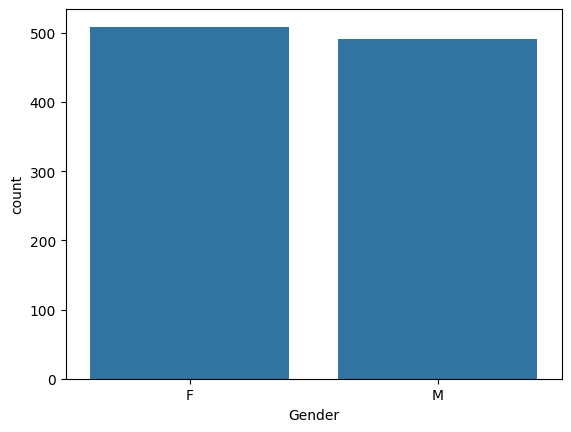

In [ ]:
print(data.Gender.value_counts())
sns.countplot(data=data,x='Gender')
plt.show()

In [ ]:
# identifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['First Name', 'Middle Initial', 'Last Name', 'Gender', 'EMail',
       'Customer Since', 'SSN', 'Geography'],
      dtype='object')


In [ ]:
# identifying the numerical variables
int_var= data.select_dtypes(include= ["int"]).columns
print(int_var)

Index(['CustomerId', 'order_id', 'CreditScore', 'age', 'PhoneNumber', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')


In [ ]:
data[target].value_counts()

0    797
1    203
Name: Exited, dtype: int64

Text(0.5, 1.0, 'target variable')

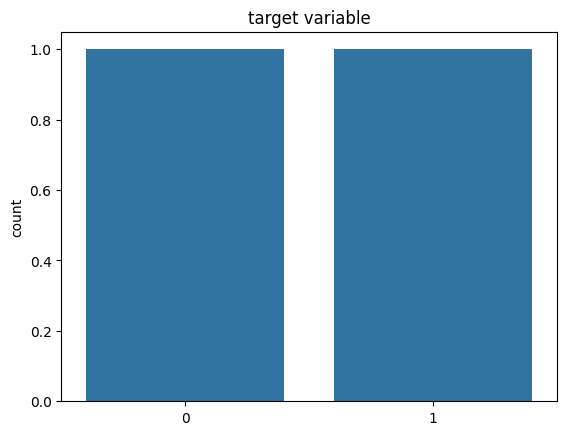

In [ ]:
sns.countplot(data[target].value_counts())
plt.title("target variable")

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Feature Engineering
def feature_engineering(data):
    # Creating a new feature 'AgeGroup' based on age ranges
    age_bins = [0, 18, 35, 50, 100]
    age_labels = ['0-18', '19-35', '36-50', '51+']
    data['AgeGroup'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

    # Creating a new feature 'HighIncome' indicating if the income is high (arbitrary threshold)
    data['HighIncome'] = data['EstimatedSalary'].apply(lambda x: 1 if x > 50000 else 0)


    # Mapping 'Gender' to numerical values (assuming 'Gender' is a categorical variable)
    data['GenderGroup'] = data['Gender'].map({'M': 0, 'F': 1})

    return data

# Apply feature engineering to the customer data
customer_data = feature_engineering(data)

# Selecting relevant features for the model

int_var= data.select_dtypes(include= ["int"]).columns
#print(int_var)
features_initial = [i for i in int_var if i != target and i != primarykey]


# Print the new list
print(features_initial)
#features = ['Age', 'Income', 'EmailsSent', 'InterestPaid', 'Gender', 'HighIncome', 'PurchasePerEmail', 'ClickedRatio']
#features = ['CreditScore', 'age', 'Tenure', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'AgeGroup','HighIncome','GenderGroup']
features = features_initial
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(customer_data[features], customer_data['Exited'], test_size=0.2, random_state=42)


# Initialize the model
clf = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=clf, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Print ranking of features
print("RFE Ranking:")
print(pd.Series(rfe.ranking_, index=features).sort_values())



['order_id', 'CreditScore', 'age', 'PhoneNumber', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'HighIncome', 'GenderGroup']
RFE Ranking:
order_id          1
CreditScore       1
age               1
PhoneNumber       1
NumOfProducts     1
Tenure            2
IsActiveMember    3
GenderGroup       4
HasCrCard         5
HighIncome        6
dtype: int64


# Model Training

In [ ]:
# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# SVM
from sklearn.svm import SVC

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)

SVC(gamma=0.5)

# Prediction - Model Evaluation

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy}')

Random Forest Model Accuracy: 0.82


In [ ]:
#Predict the response for test dataset
svm_y_pred = clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Model Accuracy: {svm_accuracy}')

SVM Model Accuracy: 0.82
